In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_theme(style='whitegrid', palette='deep')

import os
import mido
import pretty_midi as pm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout

import tensorflow as tf
# import torch as pt
import joblib


import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [17]:

# Function to extract pitch, velocity, and tempo statistics
def extract_note_statistics(file_path):
    midi_data = pm.PrettyMIDI(file_path)
    
    # Extract pitch and velocity from notes
    pitches = [note.pitch for instrument in midi_data.instruments for note in instrument.notes]
    velocities = [note.velocity for instrument in midi_data.instruments for note in instrument.notes]
    
    # Extract tempos
    _, tempos = midi_data.get_tempo_changes()

    # Calculate statistics
    features = {
        'pitch_mean': pd.Series(pitches).mean(),
        'pitch_std': pd.Series(pitches).std(),
        'pitch_min': pd.Series(pitches).min(),
        'pitch_max': pd.Series(pitches).max(),
        'velocity_mean': pd.Series(velocities).mean(),
        'velocity_std': pd.Series(velocities).std(),
        'velocity_min': pd.Series(velocities).min(),
        'velocity_max': pd.Series(velocities).max(),
        'tempo_mean': pd.Series(tempos).mean(),
        'tempo_std': pd.Series(tempos).std(),
        'tempo_min': pd.Series(tempos).min(),
        'tempo_max': pd.Series(tempos).max()
    }
    
    return features

# Function to load midi files and extract statistics
def load_midi_files_statistics_to_df(directory_path, composer):
    midi_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.lower().endswith(('.mid', '.midi'))]
    data = []
    
    for file in midi_files:
        try:
            features = extract_note_statistics(file)
            features['composer'] = composer
            data.append(features)
        except Exception as e:
            print(f"Error processing file {file}: {e}")
    
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(data)
    
    return df


# file_path = 'C:\\Users\\gabri\\OneDrive\\Desktop\\MSAAI\\AAI-511\\aai-511_group1\\midiclassics\\'  # Replace with your actual path
composers = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

# Dictionary to hold DataFrames for each composer
composer_dataframes = {}

random_state = 88

for composer in composers:
    composer_folder = os.path.join(file_path, composer)
    composer_df = load_midi_files_statistics_to_df(composer_folder, composer)

    if composer == 'Bach':
        composer_df = composer_df.sample(n=1000, random_state=random_state)

    composer_dataframes[composer] = composer_df
    print(f"{composer} DataFrame:")
    print(composer_df.head())

# Merge all DataFrames into a single DataFrame
all_composers_df = pd.concat(composer_dataframes.values(), ignore_index=True)

# Display the merged DataFrame
print("Merged DataFrame:")
print(all_composers_df.head())


c:\Users\gabri\anaconda3\envs\tf\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Bach DataFrame:
     pitch_mean  pitch_std  pitch_min  pitch_max  velocity_mean  velocity_std  \
5     62.928000   7.963951         43         77      96.000000      0.000000   
824   62.975291   9.446006         38         84      79.627907      8.246453   
352   60.763066   7.996916         39         77      96.000000      0.000000   
338   59.925325   7.599349         38         74      96.000000      0.000000   
737   63.935422  12.404394         26         88      93.889173      5.415154   

     velocity_min  velocity_max  tempo_mean  tempo_std   tempo_min  \
5              96            96   96.000000        NaN   96.000000   
824            56            88   73.672768  17.197302   40.019770   
352            96            96   96.000000        NaN   96.000000   
338            96            96  104.000014        NaN  104.000014   
737            80            96   88.000023        NaN   88.000023   

      tempo_max composer  
5     96.000000     Bach  
824   90.044527     Ba

c:\Users\gabri\anaconda3\envs\tf\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Beethoven DataFrame:
   pitch_mean  pitch_std  pitch_min  pitch_max  velocity_mean  velocity_std  \
0   61.835050  12.255348         31         89      57.231817     22.262545   
1   63.630401  15.117112         24        103     103.136829     13.209776   
2   63.373269  14.092323         29         96      49.801939     13.545758   
3   68.577693  15.219059         29        101      64.913239     25.335123   
4   62.708117  14.936541         23         96      69.349412     19.726618   

   velocity_min  velocity_max  tempo_mean  tempo_std   tempo_min   tempo_max  \
0            13           101  236.031833        NaN  236.031833  236.031833   
1            55           114  230.585794  42.879885   85.000043  300.000000   
2             8           111  167.519966  26.758328  120.000000  224.000119   
3            15           123  104.071299  14.882485   10.000000  160.999917   
4            28           127   88.083108  19.318921   22.000006  250.000000   

    composer  
0  Beeth

c:\Users\gabri\anaconda3\envs\tf\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Chopin DataFrame:
   pitch_mean  pitch_std  pitch_min  pitch_max  velocity_mean  velocity_std  \
0   65.149291  16.226595         27        101      63.552961      6.931118   
1   61.367968   9.020531         32         80      97.889782     16.374614   
2   60.031390   8.081577         38         74      87.372197      7.584289   
3   59.824047   8.847284         37         80     100.079179      1.461058   
4   60.806968   9.351923         38         77     100.000000      0.000000   

   velocity_min  velocity_max  tempo_mean  tempo_std   tempo_min   tempo_max  \
0            48            96  180.000180        NaN  180.000180  180.000180   
1            66           127  184.389203  20.082431  105.006537  213.067425   
2            64           114   98.720467   1.091611   95.003903  100.031843   
3           100           127  136.083544  15.941387   65.013799  160.091786   
4           100           100   63.003966        NaN   63.003966   63.003966   

  composer  
0   Chopin  


c:\Users\gabri\anaconda3\envs\tf\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Error processing file C:\Users\gabri\OneDrive\Desktop\MSAAI\AAI-511\aai-511_group1\midiclassics\Mozart\K281 Piano Sonata n03 3mov.mid: Could not decode key with 2 flats and mode 2
Mozart DataFrame:
   pitch_mean  pitch_std  pitch_min  pitch_max  velocity_mean  velocity_std  \
0   64.623156  12.242479         36         86      64.000000      0.000000   
1   65.073529   9.343811         30         88      81.130552     10.144531   
2   62.074627  10.920332         33         86      64.000000      0.000000   
3   64.841060  10.701689         38         83     127.000000      0.000000   
4   63.460317  12.354394         40         81     127.000000      0.000000   

   velocity_min  velocity_max  tempo_mean  tempo_std   tempo_min   tempo_max  \
0            64            64  112.749958  10.719911  100.000000  125.000000   
1            62           118   36.091674   2.277562   18.000002   38.299991   
2            64            64  116.999944  18.073885   96.000000  137.999876   
3      

In [30]:
all_composers_df.head()

pitch_std  pitch_min  pitch_max  velocity_mean  velocity_std  velocity_min  \
0   7.963951         43         77      96.000000      0.000000            96   
1   9.446006         38         84      79.627907      8.246453            56   
2   7.996916         39         77      96.000000      0.000000            96   
3   7.599349         38         74      96.000000      0.000000            96   
4  12.404394         26         88      93.889173      5.415154            80   

   velocity_max  tempo_mean   tempo_min   tempo_max composer  
0            96   96.000000   96.000000   96.000000     Bach  
1            88   73.672768   40.019770   90.044527     Bach  
2            96   96.000000   96.000000   96.000000     Bach  
3            96  104.000014  104.000014  104.000014     Bach  
4            96   88.000023   88.000023   88.000023     Bach

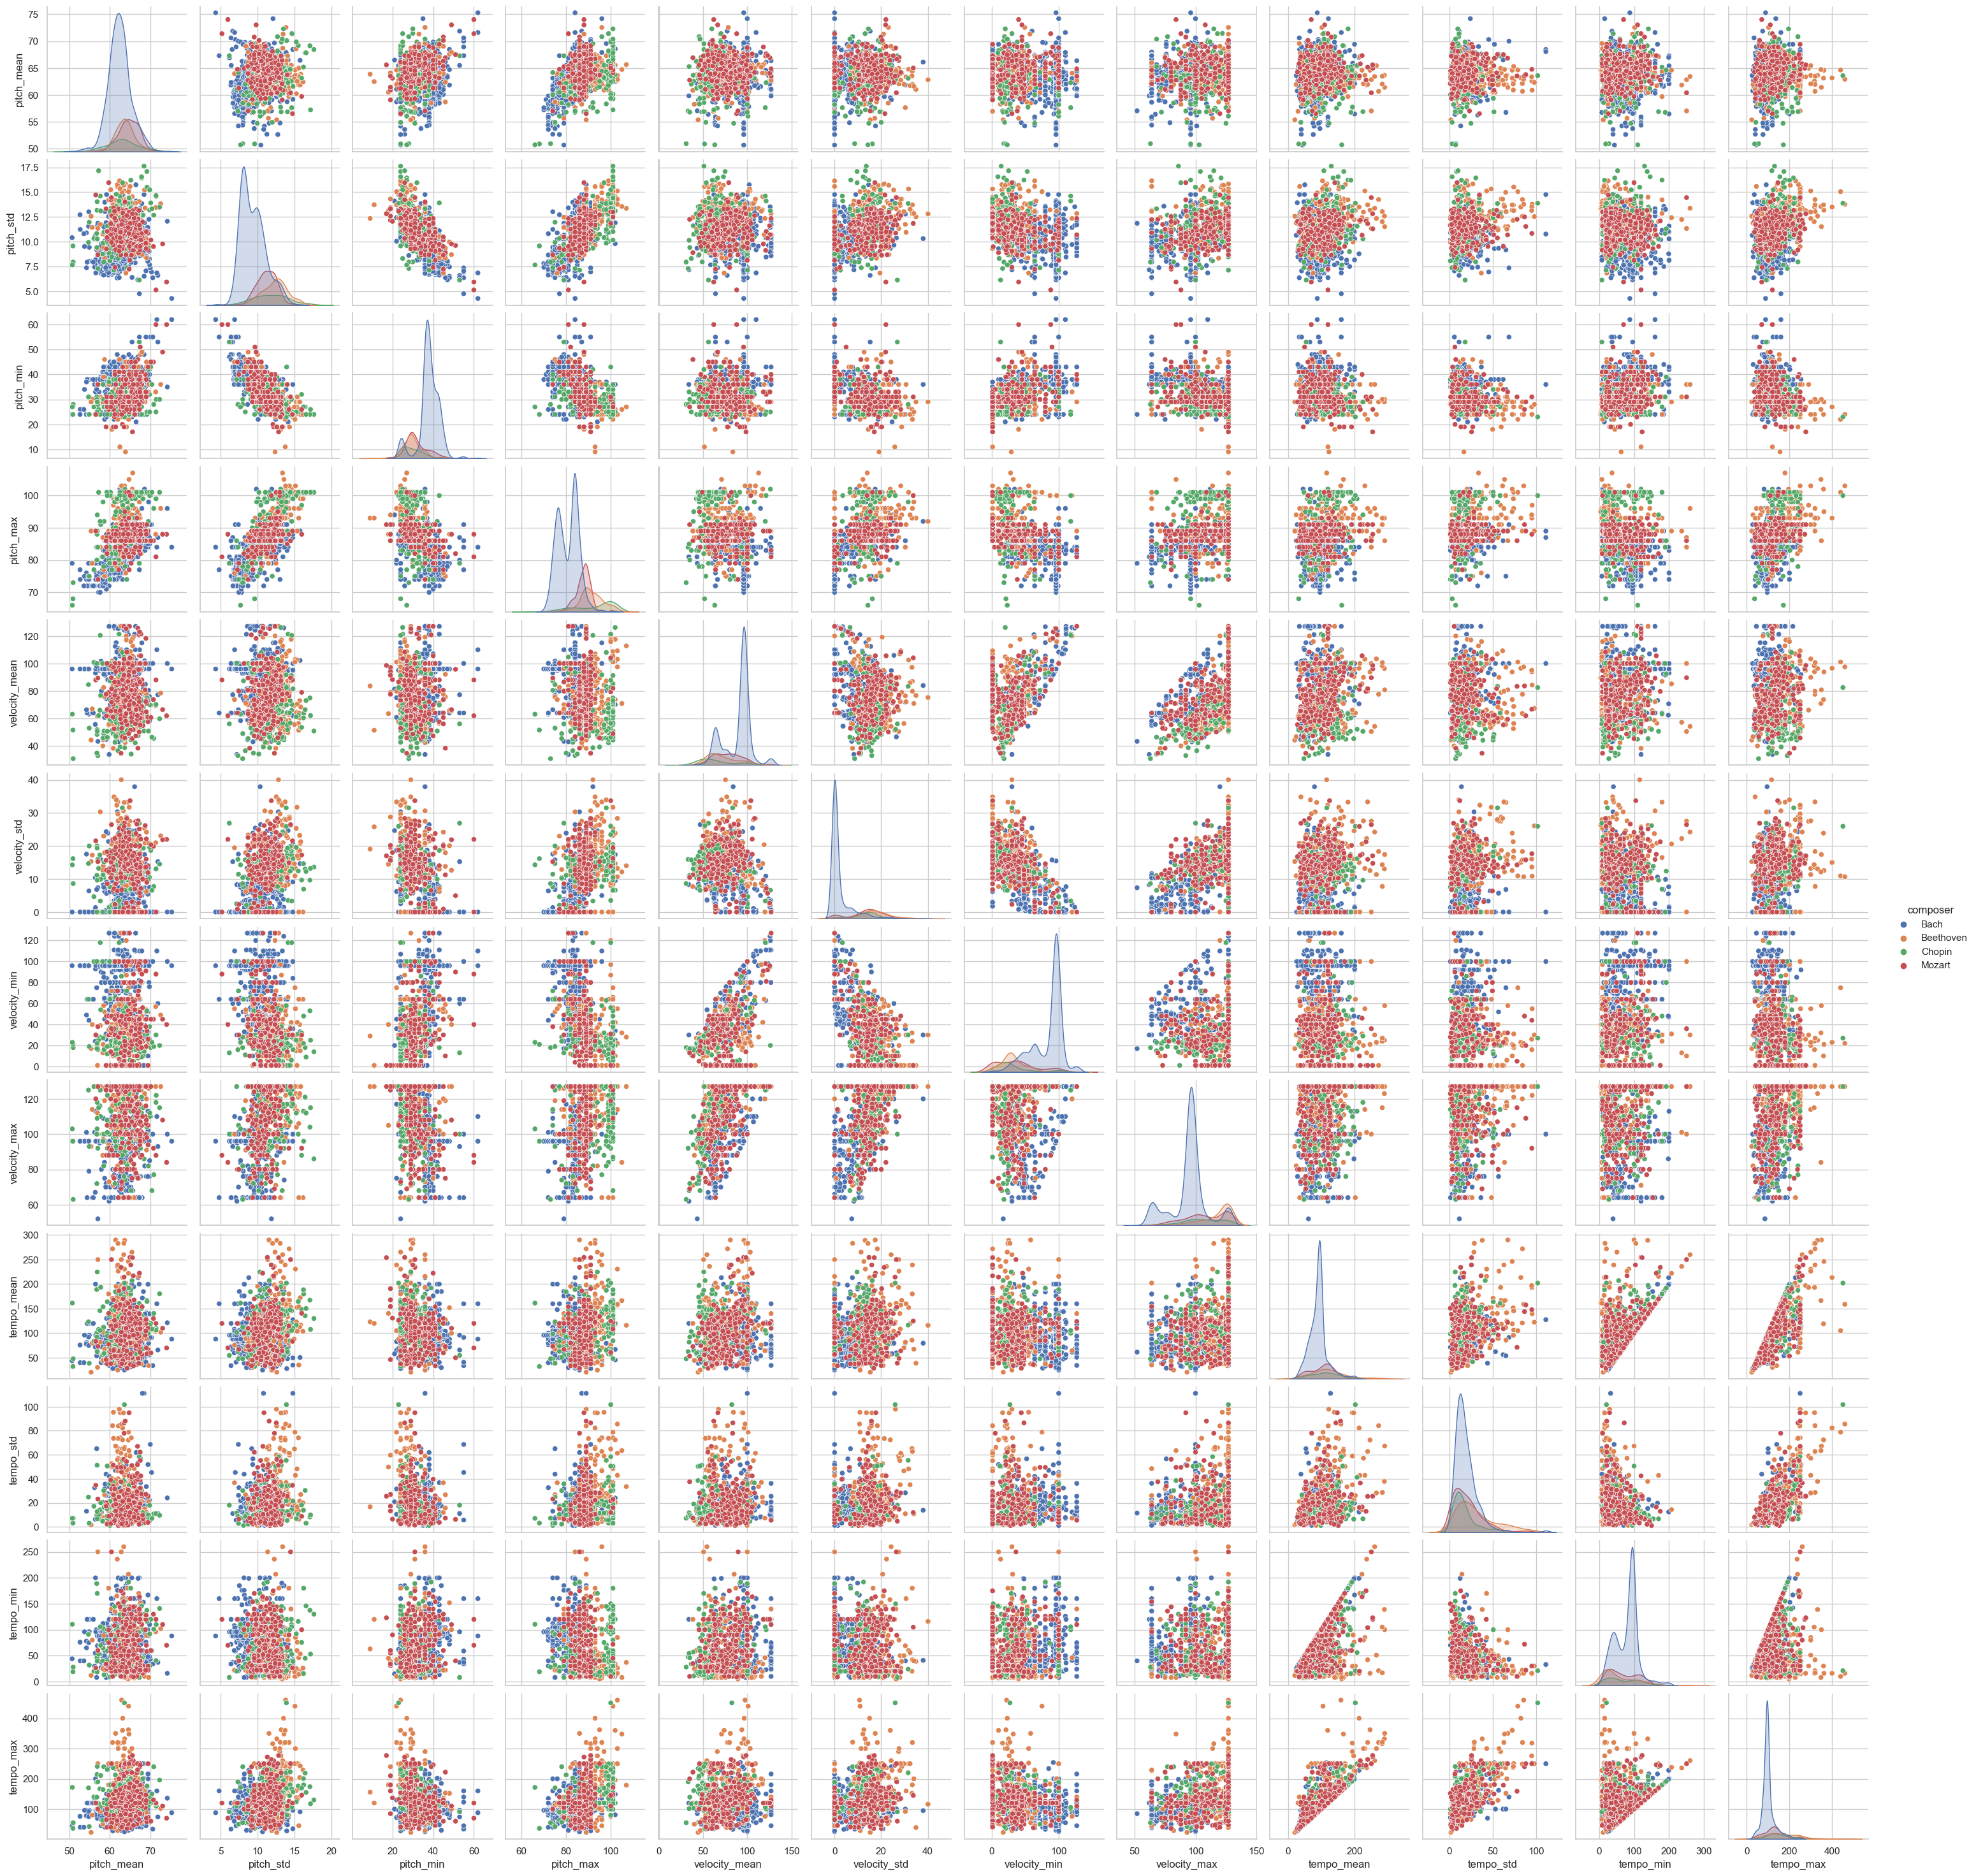

In [19]:
sns.pairplot(all_composers_df, hue='composer')

In [20]:
total_nan = all_composers_df.isna().sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan}")

Total number of NaN values in the DataFrame: 763


In [21]:
all_composers_df = all_composers_df.drop(columns='tempo_std')
all_composers_df = all_composers_df.drop(columns='pitch_mean')

In [23]:
all_composers_df.head()

pitch_std  pitch_min  pitch_max  velocity_mean  velocity_std  velocity_min  \
0   7.963951         43         77      96.000000      0.000000            96   
1   9.446006         38         84      79.627907      8.246453            56   
2   7.996916         39         77      96.000000      0.000000            96   
3   7.599349         38         74      96.000000      0.000000            96   
4  12.404394         26         88      93.889173      5.415154            80   

   velocity_max  tempo_mean   tempo_min   tempo_max composer  
0            96   96.000000   96.000000   96.000000     Bach  
1            88   73.672768   40.019770   90.044527     Bach  
2            96   96.000000   96.000000   96.000000     Bach  
3            96  104.000014  104.000014  104.000014     Bach  
4            96   88.000023   88.000023   88.000023     Bach

In [24]:
total_nan = all_composers_df.isna().sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan}")


Total number of NaN values in the DataFrame: 0


In [34]:
# Extract features and labels
X = all_composers_df.drop(columns=['composer']).values
y = all_composers_df['composer'].values

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape X for CNN (assuming X.shape = (num_samples, num_features))
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [35]:
# # Define the model
# model = models.Sequential()

# # 1D Convolutional layer
# model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
# # model.add(layers.MaxPooling1D(pool_size=2))

# # LSTM layer
# model.add(layers.LSTM(25, return_sequences=False))

# # Fully connected layer
# model.add(layers.Dense(25, activation='relu'))

# # Output layer
# model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
model = models.Sequential()
# First Convolutional layer
model.add(layers.Conv1D(filters=512, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
#model.add(layers.MaxPooling1D(pool_size=2))

# Second Convolutional layer
model.add(layers.Conv1D(filters=256, kernel_size=3, activation='relu'))
#model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.02))

# Third Convolutional layer
model.add(layers.Conv1D(filters=256, kernel_size=3, activation='relu'))
#model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.02))

model.add(layers.Conv1D(filters=256, kernel_size=3, activation='relu'))
#model.add(layers.MaxPooling1D(pool_size=2))

# LSTM layer
model.add(layers.LSTM(50, return_sequences=True))

# LSTM layer
model.add(layers.LSTM(50, return_sequences=False))
# Fully connected layer
model.add(layers.Dense(100, activation='relu'))

# Output layer
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Save the model
# model.save('composer_prediction_model.h5')

Epoch 1/20
181/181 [==============================] - 12s 49ms/step - loss: 0.8243 - accuracy: 0.6648 - val_loss: 0.6336 - val_accuracy: 0.7516
Epoch 2/20
181/181 [==============================] - 8s 46ms/step - loss: 0.6920 - accuracy: 0.7064 - val_loss: 0.5829 - val_accuracy: 0.7578
Epoch 3/20
181/181 [==============================] - 8s 47ms/step - loss: 0.6473 - accuracy: 0.7417 - val_loss: 0.5454 - val_accuracy: 0.7578
Epoch 4/20
181/181 [==============================] - 8s 46ms/step - loss: 0.6175 - accuracy: 0.7611 - val_loss: 0.5886 - val_accuracy: 0.7826
Epoch 5/20
181/181 [==============================] - 8s 47ms/step - loss: 0.5767 - accuracy: 0.7798 - val_loss: 0.5796 - val_accuracy: 0.8199
Epoch 6/20
181/181 [==============================] - 8s 46ms/step - loss: 0.5476 - accuracy: 0.7964 - val_loss: 0.4986 - val_accuracy: 0.8261
Epoch 7/20
181/181 [==============================] - 8s 45ms/step - loss: 0.5284 - accuracy: 0.7957 - val_loss: 0.5964 - val_accuracy: 0.788

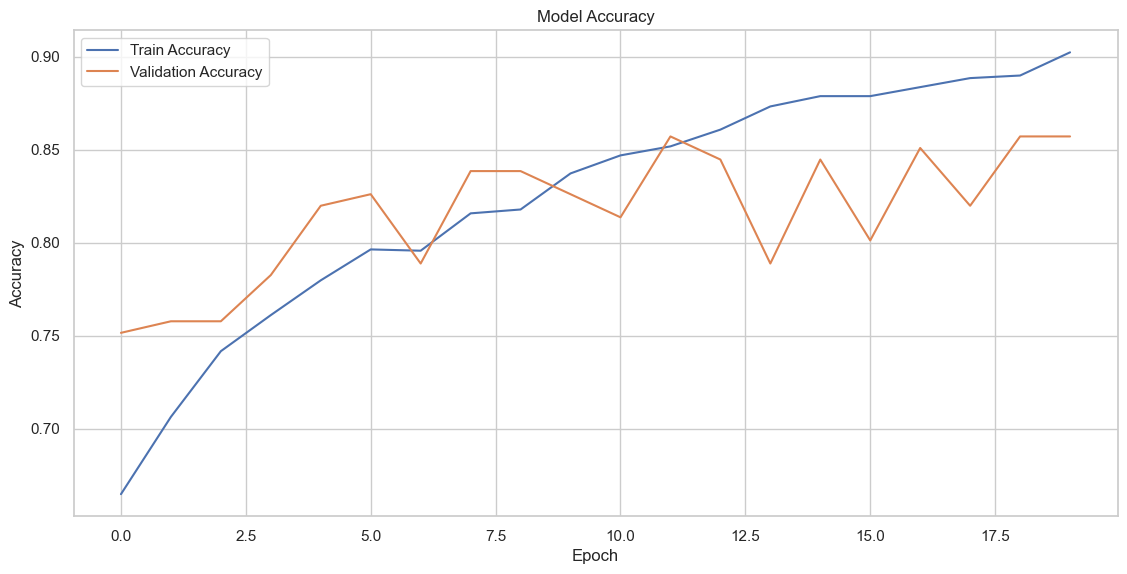

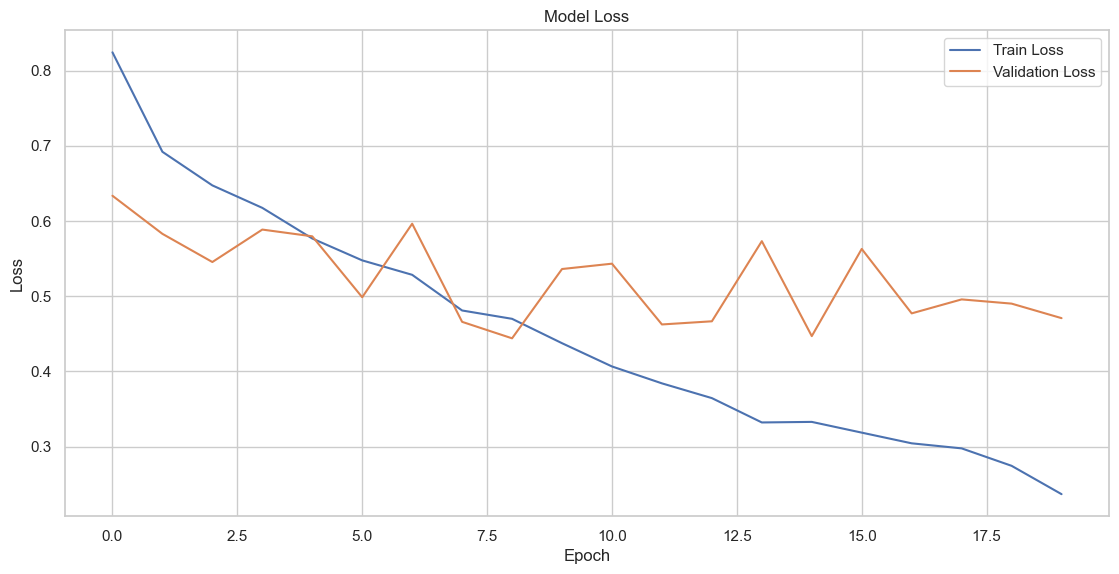

In [49]:
# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()